# Exploratory Data Analysis of the Kingston Housing Data - Data Cleaning

## Data Preprocessing

### Imports

In [1]:
import numpy as np
import pandas as pd
import math
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None) # no dots (...) in DataFrame columns

### An initial look at the Data

First, let's load the Kingston housing prices data set and get an overview of the columns.

In [2]:
# Load the Data Set
data = pd.read_csv('King_County_House_prices_dataset.csv')
# Get the number of rows and columns
data.shape

(21597, 21)

In [3]:
# Get the column names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Get a feel for the Data with a sample
data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18568,9238900850,9/19/2014,688000.0,3,1.50,1760,4880,1.5,0.0,3.0,3,8,1290,470.0,1928,0.0,98136,47.5334,-122.388,1840,4998
10169,5201000030,3/23/2015,597000.0,4,2.50,2370,41338,2.0,0.0,0.0,3,8,2370,0.0,1995,0.0,98077,47.7379,-122.052,2340,46661
4465,3335000025,11/12/2014,468000.0,3,2.00,1570,6300,1.0,0.0,0.0,3,7,820,750.0,1953,2005.0,98118,47.5565,-122.275,1510,4281
4304,7853340490,6/17/2014,386000.0,2,2.50,1620,3196,2.0,0.0,0.0,3,8,1620,0.0,2008,NaN,98065,47.5167,-121.878,1750,2828
19654,745530240,12/26/2014,865950.0,5,3.50,4890,12039,2.0,0.0,0.0,3,9,3590,1300.0,2014,0.0,98011,47.7338,-122.208,4590,10079
1805,2025770560,11/3/2014,930000.0,4,4.25,5710,24663,2.0,0.0,0.0,3,11,5710,0.0,2007,0.0,98092,47.3065,-122.158,4060,23847
13091,546000865,9/19/2014,556000.0,3,1.00,1800,4005,1.5,0.0,0.0,4,7,1160,640.0,1929,NaN,98117,47.6876,-122.380,1240,4005
17223,9276200190,4/16/2015,569950.0,5,1.00,1420,6250,1.5,0.0,0.0,4,8,1420,0.0,1926,0.0,98116,47.5807,-122.389,1420,6250
623,461001615,2/25/2015,605000.0,2,1.75,1760,5000,1.0,0.0,0.0,4,7,940,820.0,1927,NaN,98117,47.6820,-122.372,1530,5000
19341,808300180,2/11/2015,454000.0,4,2.50,3040,12522,2.0,0.0,0.0,3,7,3040,0.0,2000,NaN,98019,47.7247,-121.959,2490,9742


In [5]:
# Some info on the datatypes
data.info()
# There are only non-null values. We won't have to check for that in the future

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Examining and Cleaning the Data - One Column at a time

There are 21 columns in this Data Set. Before we can explore the relationship between various variables we need to make sense of what they actually represent - and if there are missing/nonsensical values or other problems with them.

To make sense of the column names, we will also consult the attached file 'column_names.md'.

Let's go over every column:

**Column 1 - 'id'**

The file 'column_names.md' defines id as a unique identifier for a house. Let's take a look at the data.

In [6]:
# get the range of id
data.id.min(), data.id.max()

(1000102, 9900000190)

In [7]:
# Is the id really unique for every row?
data.id.nunique(), len(data.index)

(21420, 21597)

In [8]:
# No, some houses seem to be included multiple times. 
# This could mean that someone accidentily put in the exact same row multiple times.
# Let's check for this case.
data.duplicated().any()

False

In [9]:
# There are no duplicated rows
# It would appear that some houses were simply sold more than once.
# These houses could have undergone changes or a different price could have been paid for the exact same house.
# Since all of this is relevant information for our evaluation of housing prices and none of the entries are
# obviously faulty, we will keep all rows for now.

# What is the maximum number a id is duplicated in the Data Frame
data[data.duplicated(subset=['id'],keep=False)].pivot_table(index = ['id'], aggfunc ='size').max()

3

The variable **id** (nominal) is a unique identifier for a house. The number of digits in an **id** varies. A small number of houses seem to be sold more than once, but none are sold more than three times. 

**Column 2 - 'date'**

In [10]:
# From our sample in the beginning we can conclude that the notation is (d)d/(m)m/yyyy
# Let's check wether any value is a non-Date
pd.to_datetime(data.date, errors='coerce').isna().any()

False

In [11]:
# When was the data collected?
pd.to_datetime(data.date, errors='coerce').min(), pd.to_datetime(data.date, errors='coerce').max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [12]:
# Let's convert the data to timestamps
data['date'] = pd.to_datetime(data.date)

The variable **date** (can either be treated as ordinal or interval) specifies the Date a house was sold. The Data in this set was collected from 2014-05-02 to 2015-05-27. 

**Column 3 - 'price'**

In [13]:
# We already know there a no nulls or non-float values
data.price.min(), data.price.max(), data.price.median()

(78000.0, 7700000.0, 450000.0)

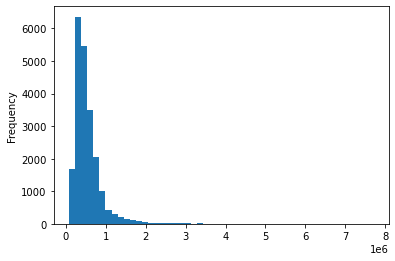

In [14]:
# What do the prices look like?
data.price.plot.hist(bins=50);

In [15]:
# The prices are skewed to the right. Most houses are priced up to a million dollars
# Only a few houses are worth more than 2 million dollars
# How many super expensive outliers are there?
data.groupby(pd.cut(data.price, [i * (10**6) for i in [0, 2, 3, 4, 5, 6, 7, 8]])).price.count()

price
(0, 2000000]          21399
(2000000, 3000000]      153
(3000000, 4000000]       34
(4000000, 5000000]        4
(5000000, 6000000]        4
(6000000, 7000000]        1
(7000000, 8000000]        2
Name: price, dtype: int64

In [16]:
# In total there are only 11 houses above 4,000,000 dollars
# There are 2 houses above $ 7,000,000

The variable **price** (ratio) denotes the price a house sold for. This variable will be our prediction target for this study. The prices of houses ranges from \\$78,000 to \\$7,700,000, although more than 99% of houses are in the \\$78,0000 to \\$2,000,000 range.

**Column 4 - 'bedrooms'**



In [17]:
data.bedrooms.min(), data.bedrooms.max(), data.bedrooms.median()

(1, 33, 3.0)

In [18]:
# What, 33 bedrooms?  
# This might be an outlier
data.groupby(pd.cut(data.bedrooms, [1,2,4,8,12, 33])).bedrooms.count()


bedrooms
(1, 2]       2760
(2, 4]      16706
(4, 8]       1924
(8, 12]        10
(12, 33]        1
Name: bedrooms, dtype: int64

In [19]:
# No other house has more than 12 bedrooms, but it could maybe be an old hospital or similar
# Let's look at that particular house
data[data.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [20]:
# Its neither very expensive nor big enough to actually have that many bedrooms
# 33 could be a typo, whoever entered the data might have had their finger stuck on 3
# Since we have a plethora of other observations we will simpl delete that row
data.drop(15856, inplace = True)
data.bedrooms.max()

11

The variable **bedrooms** (ratio) expresses the number of bedrooms. It ranges from 1 to 11.

**Column 5 - 'bathrooms'**

In [21]:
data.bathrooms.min(), data.bathrooms.max(), data.bathrooms.median()

(0.5, 8.0, 2.25)

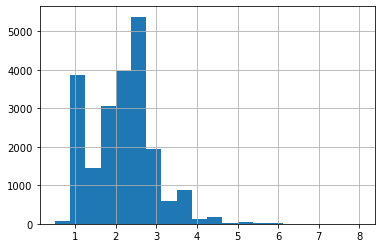

In [22]:
data.bathrooms.hist(bins=20); # Nothing seems out of the ordingary

The variable **bathrooms** (can be treated as either ordinal or intervall) contains the number of bathrooms. There also exist 0.5 and 0.75 bathrooms as well as multiples of those numbers. A 0.5 bathroom is a bathroom with only a toilet and sink. A 0.75 bathroom is a bathroom with only a toilet, sink and shower (no bathtub).

**Column 6 - 'sqft_living'**

In [23]:
data.sqft_living.min(), data.sqft_living.max(), data.sqft_living.median()

(370, 13540, 1910.0)

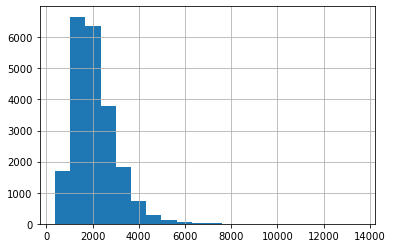

In [24]:
data.sqft_living.hist(bins=20);

In [25]:
data.groupby(pd.cut(data.sqft_living, [1,4000,8000,14000])).sqft_living.count()

sqft_living
(1, 4000]        20814
(4000, 8000]       773
(8000, 14000]        9
Name: sqft_living, dtype: int64

In [26]:
data[data.sqft_living > 8000] # This seems realistic

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800
14542,2303900035,2014-06-11,2890000.0,5,6.25,8670,64033,2.0,0.0,4.0,3,13,6120,2550.0,1965,NaN,98177,47.7295,-122.372,4140,81021
18288,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,0.0,0.0,3,11,8020,0.0,2001,NaN,98006,47.5675,-122.189,4160,18969


The variable **sqft_living** (ratio) is the area of the living space in square feet (1 square foot = 0,093 square metres).

**Column 7 - 'sqft_lots'**

In [27]:
data.sqft_lot.min(), data.sqft_lot.max(), data.sqft_lot.median()

(520, 1651359, 7619.0)

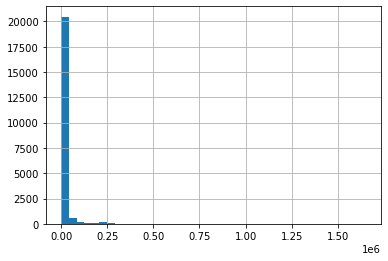

In [28]:
data.sqft_lot.hist(bins=40); # like most of the data, sqft_lot is right skewed

The variable **sqft_lot** (ratio) is the are of the lot in square feet.

**Column 8 - 'floors'**

In [29]:
data.floors.value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

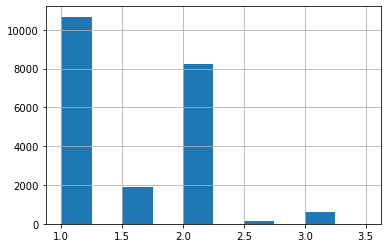

In [30]:
data.floors.hist();

The **floors** (ordnial) variable tracks the number of floors in a house. Half floors are possible. It is not defined what constitutes a half floor. They may be attics, balconies etc. and will ne kept in the data for now.

**Column 9 - 'waterfront'**

In [31]:
data.waterfront.value_counts(dropna = False)

0.0    19074
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [32]:
# There are NaN - values in this column
# We will leave them in for now but have to be mindful of that in the future

The **waterfront** variable (dichotomous) identifies whether a house has a view to a waterfront. For some houses this is not tracked (NaN).

**Column 10 - 'view'**


In [33]:
data.view.value_counts(dropna = False)

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

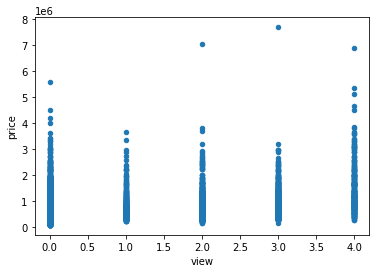

In [34]:
data.plot.scatter(y='price', x='view');

It is unclear what the **view** variable represents. It could be the number of times the property has been viewed, hower that would mean that almost all of the houses sold without being viewd which is highly unlikely. It could be some sort of grading system, either of the view of the house, the view from the house or the meeting/viewing with the house owner. **view** == 0 could mean that the view was not graded or it could be a grade itself. Since it not clear at all what this variable means and also since it does not have a clear impact on the price, the column will be discarded.

In [35]:
data.drop('view', axis=1, inplace=True)

**Column 11 - 'condition'**

In [36]:
data.condition.min(), data.condition.max(), data.condition.median()

(1, 5, 3.0)

In [37]:
data.condition.value_counts(dropna = False)

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

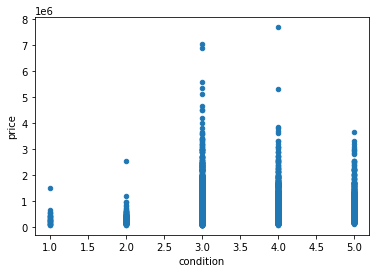

In [38]:
data.plot.scatter(y='price', x='condition');

In [39]:
data.groupby('condition').median().price

condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    525944.0
Name: price, dtype: float64

The **condition** variable (ordinal) is a grading on how good the overall condition of the house is. It ranges from 1 (worst) to 5 (best). Every house has a condition grade.

**Column 12 - 'grade'**

In [40]:
data.grade.min(), data.grade.max(), data.grade.median(), data.grade.isnull().values.any()

(3, 13, 7.0, False)

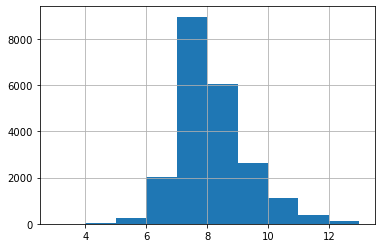

In [41]:
data.grade.hist();

According to [info.kingcounty.gov](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) the building grade represents the construction quality of improvements. It ranges from 1 to 13, hower houses with grade 1 to 3 fall short of minimum building standards. Since there are no missing values, the **grade** variable (ordinal) in this set most likely represents the construction quality in general. In the dataset we have grades from 3 to 13.

**Column 13 & 14 - 'sqft_above', 'sqft_basement'**

In [42]:
data.sqft_basement.min(), data.sqft_basement.max()

('0.0', '?')

In [43]:
# Replace the '?'-Strings with NaN
data.sqft_basement = data.sqft_basement.replace('?', np.NaN).astype('float64')

In [44]:
# Check if the sqft_above column can be expressed with the other columns
# First, get all rows where sqft_above is not equal to sqft_living - sqft_basement
data[data.sqft_living - data.sqft_basement.fillna(0) != data.sqft_above]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,2014-09-16,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,NaN,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,3,8,2780,NaN,1900,NaN,98117,47.6981,-122.368,1830,6350
309,3204800200,2015-01-08,665000.0,4,2.75,3320,10574,2.0,NaN,5,8,2220,NaN,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,2014-07-28,1350000.0,5,3.50,4800,14984,2.0,0.0,3,11,3480,NaN,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,2014-05-08,615000.0,2,1.00,1540,6872,1.0,0.0,4,7,820,NaN,1946,0.0,98119,47.6454,-122.373,1420,5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,291310180,2014-06-13,379500.0,3,2.25,1410,1287,2.0,0.0,3,7,1290,NaN,2005,0.0,98027,47.5344,-122.068,1490,1435
21109,3438500250,2014-06-23,515000.0,5,3.25,2910,5027,2.0,0.0,3,8,2040,NaN,2013,0.0,98106,47.5543,-122.359,2910,5027
21210,3278600680,2014-06-27,235000.0,1,1.50,1170,1456,2.0,0.0,3,8,1070,NaN,2007,0.0,98126,47.5493,-122.372,1360,1730
21356,6169901185,2014-05-20,490000.0,5,3.50,4460,2975,3.0,0.0,3,10,3280,NaN,2015,NaN,98119,47.6313,-122.370,2490,4231


In [45]:
# Apart from 170 rows where this is not the case, sqft_above is simply the difference of sqft_living and sqft_basement
# 1 Variable can thus be expresses through the other 2
# Since this is the case in an overwhelmingly large percentage of rows we run the risk of multicolinearity
# Because of that we delete the 'sqft_above'-column, as we will not use it in our model
data.drop('sqft_above', axis = 1, inplace = True)

# An explanation for the 170 counter examples could be that the basement simply was not filled in correctly
# because in most of these cases sqft_living was smaller than sqft_above

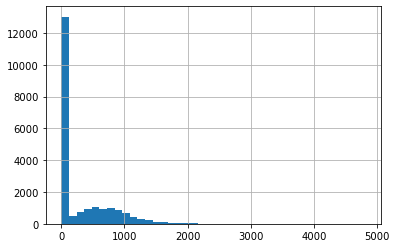

In [46]:
data.sqft_basement.hist(bins = 40); # most houses do not have a basement

The variable **sqft_basement** (ratio) denotes the size of the basement in square feet. Most houses do not have a basement. The column **sqft_above** was deleted from the data, as it did not contain any new information and would introduce multicolinearity in our model.

**Column 15 - 'yr_built'**

In [47]:
data.yr_built.min(), data.yr_built.max(), data.yr_built.median()

(1900, 2015, 1975.0)

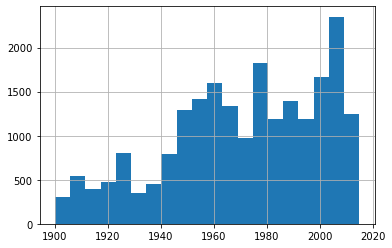

In [48]:
data.yr_built.hist(bins=20);

The **yr_built** variable (interval) is the year the house was built. 

**Column 16 - 'yr_renovated'**

In [49]:
data.yr_renovated.min(), data.yr_renovated.max(), data.yr_renovated.median()

(0.0, 2015.0, 0.0)

In [50]:
data.yr_renovated.value_counts(dropna = False)

0.0       17010
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

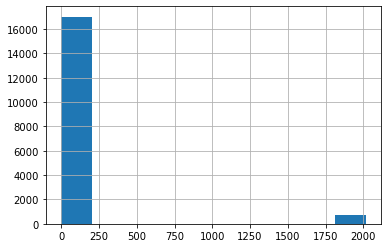

In [51]:
data.yr_renovated.hist();

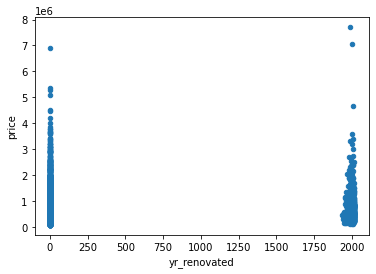

In [52]:
data.plot.scatter(x='yr_renovated', y='price');

In [53]:
# We could replace all zeroes with NaNs, since year zero does not make any sense for a regression model
# We would however then mix the old NaNs ('we do not know whether the house was renovated')
# with the zero-values ('we know the house was never renovated')

# We also know that less than 5 % of houses have been renovated for sure
# And of those we only know of the last time since only the last time is tracked as a year
# Thus a regression with this factor might not be that useful
# We will drop the column
data.drop('yr_renovated', axis = 1, inplace = True)

The **yr_renovated** variable (interval) tracks the last time a house has been renovated. Based on the sparse values of this factor it may not be maintained and tracked very well. The small amount of non-zero values is not really suitable for regression.

**Column 17 - 'zipcode'**


In [54]:
data.zipcode.min(), data.zipcode.max()

(98001, 98199)

In [55]:
data.zipcode.nunique()

70

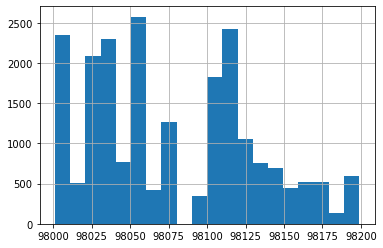

In [56]:
data.zipcode.hist(bins=20);

The **zipcode** variable (in this case nominal) is the zipcode of the adress. The dataset includes 70 different zipcodes between 98001 and 98199. Although a nominal variable with 70 different values may be unsuited for a regression model, there are other interesting things we can do with it.

**Column 18 & 19 - 'lat' & 'long'**

In [57]:
data.lat.min(), data.lat.max()

(47.1559, 47.7776)

In [58]:
data.long.min(), data.long.max()

(-122.51899999999999, -121.315)

In [59]:
data.lat.value_counts(dropna = False), data.long.value_counts(dropna = False)

(47.6624    17
 47.5491    17
 47.5322    17
 47.6846    17
 47.6711    16
            ..
 47.2785     1
 47.4162     1
 47.3870     1
 47.2313     1
 47.2715     1
 Name: lat, Length: 5033, dtype: int64,
 -122.290    115
 -122.300    111
 -122.362    104
 -122.291    100
 -122.372     99
            ... 
 -121.403      1
 -121.804      1
 -121.726      1
 -121.895      1
 -121.893      1
 Name: long, Length: 751, dtype: int64)

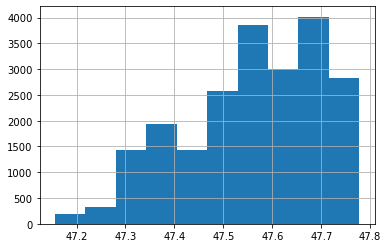

In [60]:
data.lat.hist(); 

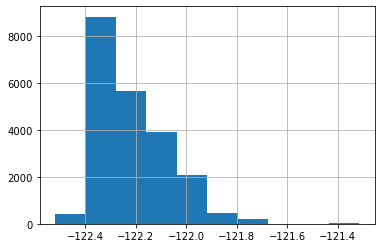

In [61]:
data.long.hist();

The variables **lat** and **long** (both interval) are the latitude and longitude coordinates of the houses. They are present for every house.

**Column 20 & 21 - 'sqft_living15' & 'sqft_lot'**

In [62]:
data.sqft_living15.min(), data.sqft_living15.max(), data.sqft_lot15.min(), data.sqft_lot15.max()

(399, 6210, 651, 871200)

In [63]:
data.sqft_living15.value_counts(dropna = False)

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [64]:
data.sqft_lot15.value_counts(dropna = False)

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

In [65]:
(data.sqft_living15 == data.sqft_living).value_counts()

False    19033
True      2563
dtype: int64

In [66]:
# In 13% of cases the 15 closest neighbours have the exact same amount of living space as the house
# This could be the case in housing schemes where different houses are identical to each other

In [67]:
(data.sqft_lot15 == data.sqft_lot).value_counts()

False    17122
True      4474
dtype: int64

In [68]:
# For the lots it is even 26%. Maybe there are standardized lot sizes in certain areas
# More investigation is required and will be performed in a later step

The variable **sqft_living15** (interval) tracks the size of living space of the closest 15 neighbors. In some cases the number is exactly the same as the variable **sqft_living**. 

**sqft_lot15** (interval) does the same for the lot size.

### Specifying Categorial Data

Part of the Data is categorial. If we want to do a regression with categorial factors we need to either specify them as such or manually create dummy variables.

There are some variables which we can either be interpreted as categorial or continous, like for example the number of bathrooms. In reality it is a categorial variable (there exists no such thing as for example 1.3 bathrooms; however specific values like .5 bathrooms do exist in the notation, although these are not literally half a room). 

On the other hand it would be more convenient to interpret and calculate a model with **bathrooms** as a continous variable. We will make our decision by looking at the variables in relation to the price. If there is a sufficient linear correlation we will take the variable as continous for our linear regression model.

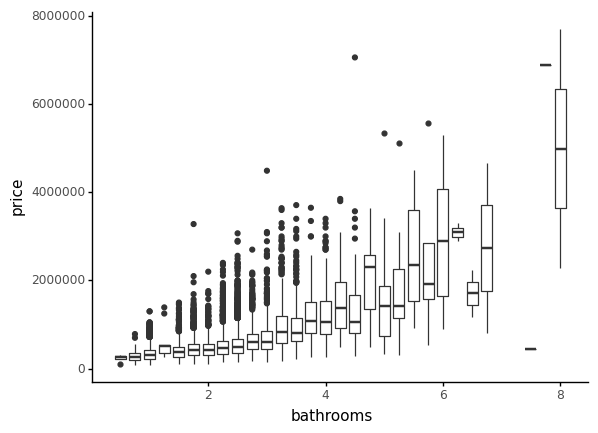

<ggplot: (8773223929292)>

In [69]:
# 'bathrooms'
(ggplot(data, aes('bathrooms', 'price', group='bathrooms'))
+ geom_boxplot()
+ theme_classic())

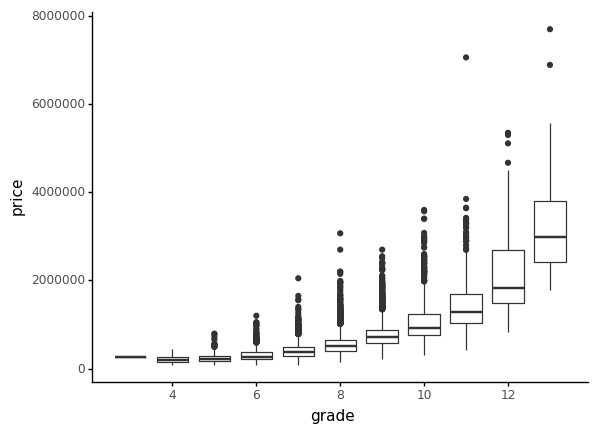

<ggplot: (-9223363263632812456)>

In [70]:
# 'grade'
(ggplot(data, aes('grade', 'price', group='grade')) 
 + geom_boxplot()
 + theme_classic())

In [71]:
# We clearly see an exponential relationship
# Hower according to the assignment we can only use basic linear regression for our model
# We can either use the data as is, knowing that we are fitting a linear regression to a non-linear relationship
# Or we could ignore (delete) the variable, knowing that there is a clear, monotone relationship
# Or we can create a dummy variable (and thus a coefficient) for each individual grade by conveting to a categorial
# We will convert to a catergorial:
data['grade']=data.grade.astype('category')

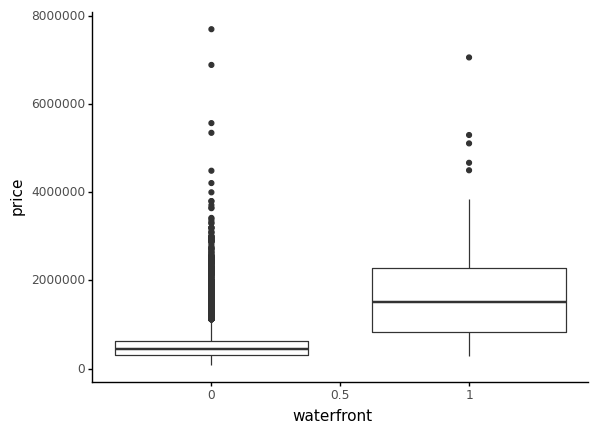

<ggplot: (8773222804954)>

In [72]:
# 'Waterfront' has only 2 values
(ggplot(data, aes('waterfront', 'price', group='waterfront')) 
+ geom_boxplot()
+ theme_classic())

In [73]:
# It already is basically a dummy variable since it is a dichotome.

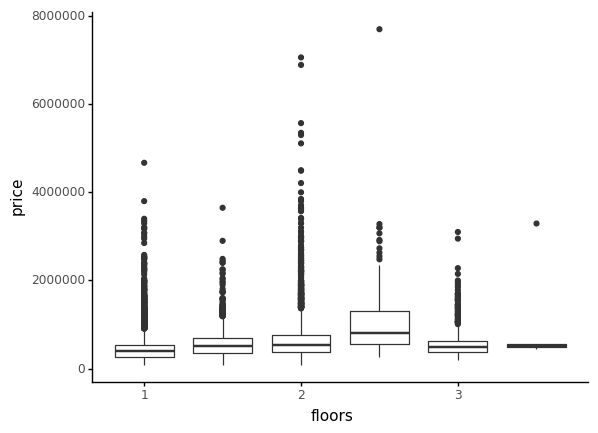

<ggplot: (-9223363263637683445)>

In [74]:
# 'floors' 
(ggplot(data, aes('floors', 'price', group='floors')) 
+ geom_boxplot()
+ theme_classic())

In [75]:
# There is not a strong correlation between price and floors
# Since in this step we do not want to interpret the relationships of variables, we will keep 'floors' for now
# We will however convert it into a categorial since a linear relationship is not apparent
data['floors'] = data.floors.astype('category')

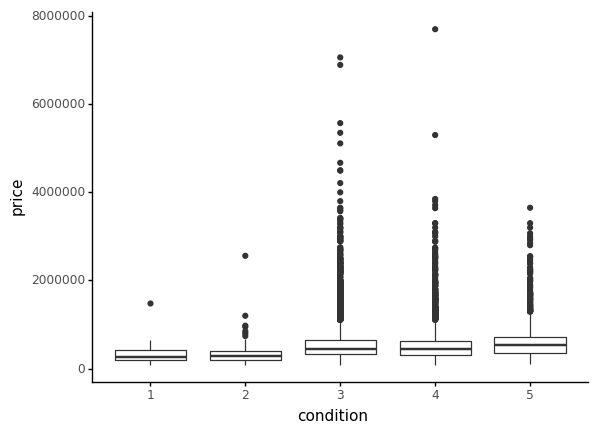

<ggplot: (8773217957668)>

In [76]:
# 'condition' 
(ggplot(data, aes('condition', 'price', group='condition')) 
+ geom_boxplot()
+ theme_classic())

In [77]:
# We will keep condition as continous

### Save the revised data set in a new file

In [78]:
# Check the dataframe one last time
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int64         
 1   date           21596 non-null  datetime64[ns]
 2   price          21596 non-null  float64       
 3   bedrooms       21596 non-null  int64         
 4   bathrooms      21596 non-null  float64       
 5   sqft_living    21596 non-null  int64         
 6   sqft_lot       21596 non-null  int64         
 7   floors         21596 non-null  category      
 8   waterfront     19220 non-null  float64       
 9   condition      21596 non-null  int64         
 10  grade          21596 non-null  category      
 11  sqft_basement  21142 non-null  float64       
 12  yr_built       21596 non-null  int64         
 13  zipcode        21596 non-null  int64         
 14  lat            21596 non-null  float64       
 15  long           2159

In [79]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,19220.000000,21596.000000,21142.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,0.007596,3.409752,291.838095,1971.000787,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.086827,0.650471,442.504364,29.375460,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,0.000000,1.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,0.000000,3.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,0.000000,3.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,0.000000,4.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,1.000000,5.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [80]:
data.to_pickle('King_County_House_prices_dataset_CLEANED.pkl')